輸入為 $(\mu, s)$ ，$\mu=(\mu_1,\cdots,\mu_n)$ 和 $s=(s_1,\cdots,s_n)$ 各自為 $n$ 維向量。

我們希望神經網路層輸出為服從 $N(\mu, e^{s}I_n)$ 的 $n$ 維向量，換言之，我們希望建構的神經網路其實是一個抽樣函數。

** 由於神經網路的輸入輸出經常沒有限制，為了讓 $s$ 具有變異數的非負特性，我們考慮 $e^{s}$ 作為變異數；換言之，$s$ 為 log-variance。

假設我們想進行抽樣的維度為 sampling_dim，則一個具抽樣函數功能的神經網路可由下述方式建構。

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Input, Lambda
from keras import backend as K

In [12]:
sampling_dim = 2

def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(sampling_dim,), mean=0, stddev=1)
    return z_mean + K.exp(z_log_var / 2) * epsilon

這裡使用到常態分配的線性特性來定義函數，亦即

$$X\sim N(0, 1)\Rightarrow \mu+\sigma X\sim N(\mu, \sigma^2)$$

In [13]:
sample_layer = Lambda(sampling, output_shape=(sampling_dim,))

In [14]:
m = Input(shape=(sampling_dim,))
s = Input(shape=(sampling_dim,))

z = sample_layer([m,s])

sample_model = Model([m,s],z)

In [15]:
sample_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 2)            0           input_5[0][0]                    
                                                                 input_6[0][0]                    
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________


In [16]:
test_mean = np.random.randint(10, size=2).reshape(1,2)
test_log_var = np.array([[0,0]])
print('平均數為：（%d, %d）' %(test_mean[0][0], test_mean[0][1]))

平均數為：（2, 6）


透過下面的指令，我們每次可以抽樣出一服從上述要求常態分配之隨機向量

In [17]:
sample_model.predict([test_mean, test_log_var])

array([[2.8155837, 6.217369 ]], dtype=float32)

In [42]:
num_of_samples = 100
np_sample = np.random.multivariate_normal([5], np.identity(1),
                                         size = 100)

print(np_sample)

[[4.67177536]
 [5.54148712]
 [3.25028253]
 [5.4949328 ]
 [5.18130505]
 [5.21228314]
 [3.42326309]
 [7.43263193]
 [4.94499824]
 [5.46207686]
 [4.9551653 ]
 [4.2426451 ]
 [4.42207851]
 [3.88958925]
 [5.67514139]
 [6.76869317]
 [5.61348374]
 [4.09896072]
 [5.3315838 ]
 [5.14621582]
 [5.48666838]
 [3.32246716]
 [3.01364664]
 [3.79539197]
 [6.33892774]
 [3.08068439]
 [4.5555801 ]
 [4.60907017]
 [4.20458254]
 [5.07107392]
 [4.34858361]
 [5.19666367]
 [5.13136534]
 [5.77082796]
 [5.66471186]
 [4.54319985]
 [5.31043417]
 [4.5900805 ]
 [5.39469121]
 [7.15755546]
 [5.12026035]
 [3.5414312 ]
 [4.88340078]
 [5.89749301]
 [4.96579517]
 [5.17710318]
 [4.9223552 ]
 [4.81828029]
 [4.53501671]
 [3.36567843]
 [5.50321372]
 [3.46284521]
 [5.27651865]
 [4.03840361]
 [4.10710672]
 [5.08630655]
 [6.21454128]
 [4.95561742]
 [5.9060559 ]
 [3.42928899]
 [5.97008512]
 [4.02535857]
 [4.52897531]
 [4.71504294]
 [7.5513719 ]
 [7.02531037]
 [4.73748582]
 [5.44229221]
 [3.59295071]
 [2.69727861]
 [5.0566006 ]
 [5.80

In [28]:
keras_sample = np.zeros((num_of_samples,2))

for i in range(num_of_samples):
    keras_sample[i] = sample_model.predict([test_mean, test_log_var])

Text(0.5, 1.0, 'Normal Random Samples using Keras/Numpy')

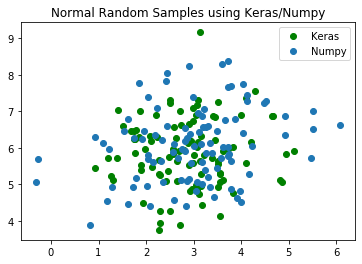

In [33]:
plt.plot(keras_sample[:,0], keras_sample[:,1],'go')
plt.plot(np_sample[:,0], np_sample[:,1],'o')

plt.legend(['Keras','Numpy'])
plt.title('Normal Random Samples using Keras/Numpy')

## 4. 恭喜你，完成學習所有建立 Variational Autoencoder 所需的重要技巧。


Variational Autoencoder (VAE) 是一個重要的非監督式學習模型，具體應用的場合為特徵抽取/資料壓縮及還原，為影像處理中常見的模型之一。

在建立 VAE中，需要的兩個重要技巧:

* 分歧-合併
* 自定義函數 (抽樣函數)

已經完成了學習，下一單元，我們將告訴各位如何建立並訓練 VAE 模型。